# Transmittance Spectrum of a Waveguide Bend

## 求出真實數值
>上部分 可以用視覺看出彎曲  
但無法看出真正的 transmittance reflectance scattered loss(散色損耗)  
通過入射功率對透射通量進行歸一化以獲得透射率  
必須進行兩次運行，一次有彎曲，一次沒有彎曲
### setup
>import,resolution,cell,pml

In [15]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

resolution = 10 # pixels/um

sx = 16  # size of cell in X direction
sy = 32  # size of cell in Y direction
cell = mp.Vector3(sx,sy,0)

dpml = 1.0
pml_layers = [mp.PML(dpml)]

In [16]:
pad = 4  # padding distance between waveguide and cell edge
w = 1    # width of waveguide

In [17]:
#定義波導位置，將水平和垂直波導中心定義為
wvg_xcen =  0.5*(sx-w-2*pad)  # x center of horiz. wvg
wvg_ycen = -0.5*(sy-w-2*pad)  # y center of vert. wvg

In [18]:
geometry = [mp.Block(size=mp.Vector3(mp.inf,w,mp.inf),
                     center=mp.Vector3(0,wvg_ycen,0),
                     material=mp.Medium(epsilon=12))]

In [19]:
fcen = 0.15  # pulse center frequency
df = 0.1     # pulse width (in frequency)
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ez,
                     center=mp.Vector3(-0.5*sx+dpml,wvg_ycen,0),
                     size=mp.Vector3(0,w,0))]

     block, center = (0,-11.5,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


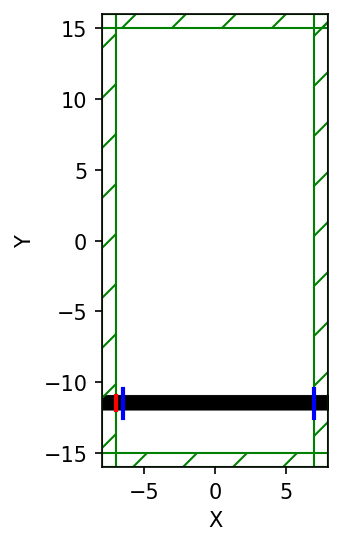

In [20]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

nfreq = 100  # number of frequencies at which to compute flux

# reflected flux
refl_fr = mp.FluxRegion(center=mp.Vector3(-0.5*sx+dpml+0.5,wvg_ycen,0), size=mp.Vector3(0,2*w,0))                            
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

# transmitted flux
tran_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml,wvg_ycen,0), size=mp.Vector3(0,2*w,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

plt.figure(dpi=150)
sim.plot2D()
plt.show()

In [7]:
pt = mp.Vector3(0.5*sx-dpml-0.5,wvg_ycen)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))

# for normalization run, save flux fields data for reflection plane
straight_refl_data = sim.get_flux_data(refl)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000133991 s
Working in 2D dimensions.
Computational cell is 16 x 32 x 0 with resolution 10
     block, center = (0,-11.5,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.055016 s
-----------
field decay(t = 50.050000000000004): 4.8251893805577874e-09 / 4.8251893805577874e-09 = 1.0
field decay(t = 100.05000000000001): 0.02880180987942579 / 0.02880180987942579 = 1.0
field decay(t = 150.1): 0.026893465093385728 / 0.02880180987942579 = 0.9337421921042793
field decay(t = 200.15): 2.3158397341290867e-13 / 0.02880180987942579 = 8.040604891928607e-12
run 0 finished at t = 200.15 (4003 timesteps)


In [8]:
# save incident power for transmission plane
straight_tran_flux = mp.get_fluxes(tran)

In [9]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors = ["darkslateblue","blue", "black", "red","yellow"]#相對應的顏色
nodes = [0.0,0.2, 0.5, 0.7,1.0]# 波0~1(MAX)相對應的值轉換顏色
mycmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))#線性變化顏色
def modu_f(fd):
    output = np.sign(fd) * np.abs(fd) ** 0.7
    return output
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True
                       ,field_parameters={'post_process':modu_f,'alpha':1, 'cmap':mycmap}
                       ,source_parameters={'alpha':1,'color':'white','linewidth':0.5,'hatch':''})
sim.run(mp.at_every(0.5,Animate),until=100)
plt.close()

FloatProgress(value=200.14999389648438, description='0% done ', max=300.1499938964844, min=200.14999389648438)

     block, center = (0,-11.5,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
Normalizing field data...
run 1 finished at t = 300.15000000000003 (6003 timesteps)


In [10]:
#from IPython.display import Video
filename = "waveguide.gif"
fps = 10
Animate.to_gif(fps,filename)
#Video(filename)

Generating GIF...


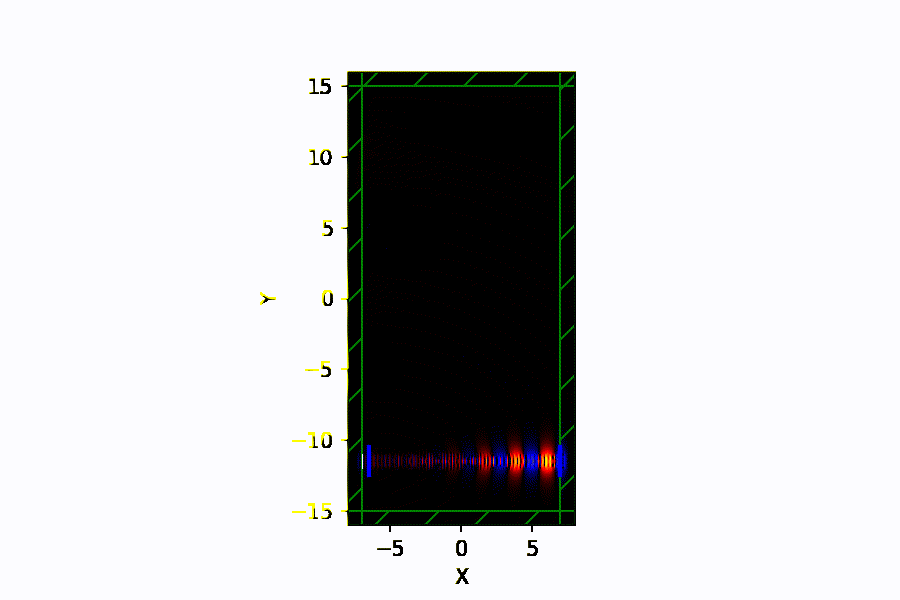

-----------
Initializing structure...
time for choose_chunkdivision = 0.0001719 s
Working in 2D dimensions.
Computational cell is 16 x 32 x 0 with resolution 10
     block, center = (-2,-11.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,28,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0637391 s
-----------
field decay(t = 50.050000000000004): 1.6976522694449e-10 / 1.6976522694449e-10 = 1.0
field decay(t = 100.05000000000001): 4.691071063910552e-07 / 4.691071063910552e-07 = 1.0
field decay(t = 150.1): 2.9928727336864534e-07 / 4.691071063910552e-07 = 0.6379934758847049
field decay(t = 200.15): 0.003927813565272275 / 0.003927813565272275 = 1.0
field decay(t = 250.20000000000002): 0.00015009081939073958 / 0.003927813565272275 = 0.03821230740627969
field decay(t = 300.2):

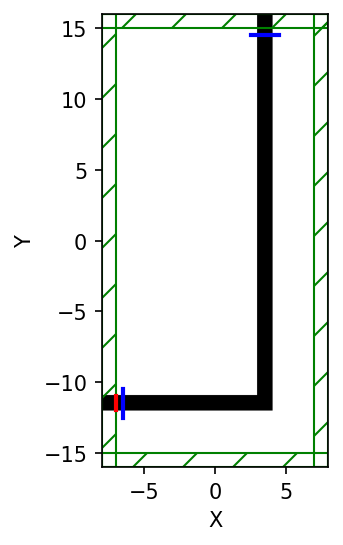

In [11]:
sim.reset_meep()

geometry = [mp.Block(mp.Vector3(sx-pad,w,mp.inf), center=mp.Vector3(-0.5*pad,wvg_ycen), material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(w,sy-pad,mp.inf), center=mp.Vector3(wvg_xcen,0.5*pad), material=mp.Medium(epsilon=12))]

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

# reflected flux
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

tran_fr = mp.FluxRegion(center=mp.Vector3(wvg_xcen,0.5*sy-dpml-0.5,0), size=mp.Vector3(2*w,0,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

# for normal run, load negated fields to subtract incident from refl. fields
sim.load_minus_flux_data(refl, straight_refl_data)

pt = mp.Vector3(wvg_xcen,0.5*sy-dpml-0.5)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

bend_refl_flux = mp.get_fluxes(refl)
bend_tran_flux = mp.get_fluxes(tran)

flux_freqs = mp.get_flux_freqs(refl)

plt.figure(dpi=150)
sim.plot2D()
plt.show()

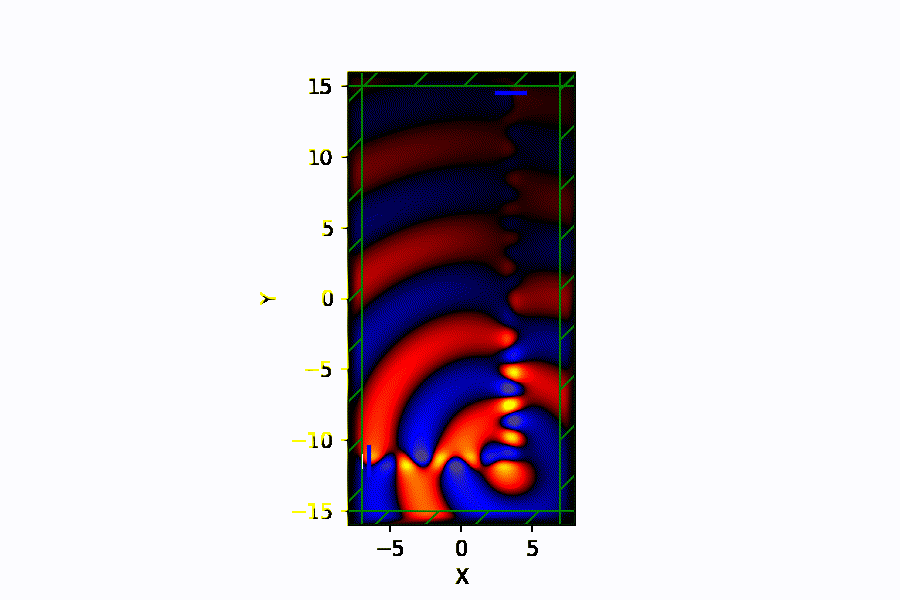

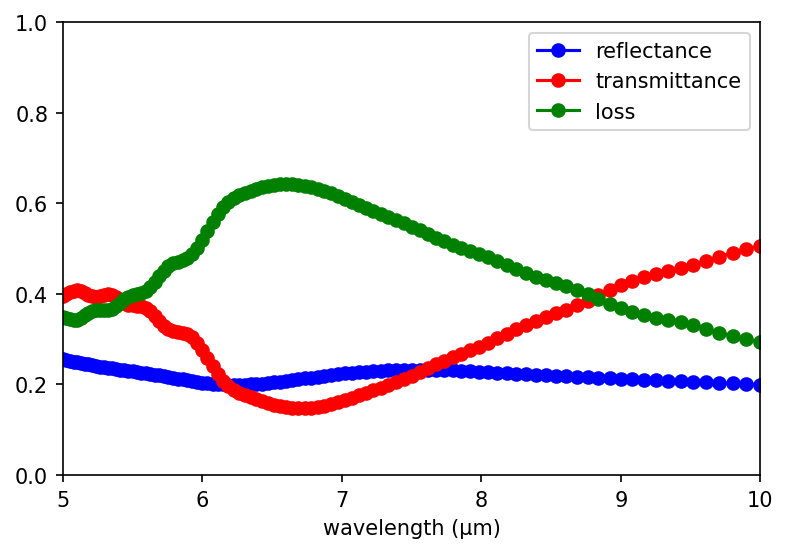

In [12]:
wl = []
Rs = []
Ts = []
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-bend_refl_flux[i]/straight_tran_flux[i])
    Ts = np.append(Ts,bend_tran_flux[i]/straight_tran_flux[i])    

if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance')
    plt.plot(wl,Ts,'ro-',label='transmittance')
    plt.plot(wl,1-Rs-Ts,'go-',label='loss')
    plt.axis([5.0, 10.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()

In [13]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors = ["darkslateblue","blue", "black", "red","yellow"]#相對應的顏色
nodes = [0.0,0.2, 0.5, 0.7,1.0]# 波0~1(MAX)相對應的值轉換顏色
mycmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))#線性變化顏色
def modu_f(fd):
    output = np.sign(fd) * np.abs(fd) ** 0.7
    return output
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True
                       ,field_parameters={'post_process':modu_f,'alpha':1, 'cmap':mycmap}
                       ,source_parameters={'alpha':1,'color':'white','linewidth':0.5,'hatch':''})
sim.run(mp.at_every(0.5,Animate),until=100)
plt.close()

FloatProgress(value=300.20001220703125, description='0% done ', max=400.20001220703125, min=300.20001220703125…

     block, center = (-2,-11.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,28,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
Normalizing field data...
run 1 finished at t = 400.20000000000005 (8004 timesteps)


In [14]:
filename = "90waveguide.gif"
fps = 10
Animate.to_gif(fps,filename)

Generating GIF...
